# Future Price Time Series Model

In [1]:
setwd("D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report")  #set my working directory
getwd()

HOUSE.df <- read.csv("ResidentialSalesWithLocation_CSV.csv", header = TRUE)  #import data into R

######################### Verify the data ##########################
head(HOUSE.df)   #Verify the first five rows of the dataframe

tail(HOUSE.df)   #Verify the last five rows of the dataframe

summary(HOUSE.df)   #To check the variables and counts

str(HOUSE.df)   #To check the data structure of the loaded dataset
####################################################################

[1] "D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report"

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,0150 0275,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407639,Old City 2,Ward 1,38.91745,-77.04023,5
2,0150 0276,1,0,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407640,Old City 2,Ward 1,38.91745,-77.04017,1
3,0150 0277,1,0,13,Hot Water Rad,N,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407641,Old City 2,Ward 1,38.91745,-77.04012,1
4,0150 0278,2,1,7,Warm Cool,Y,1,6,2,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407642,Old City 2,Ward 1,38.91745,-77.04006,5
5,0150 0279,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407643,Old City 2,Ward 1,38.91745,-77.04000,1
6,0150 0280,1,1,7,Warm Cool,Y,1,6,3,1910,⋯,1,11,960,2022/08/31 05:17:11+00,74407644,Old City 2,Ward 1,38.91745,-77.03995,1


,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
108398,PAR 01550236,2,0,13,Hot Water Rad,N,1,6,2,1934,⋯,1,12,4571,2022/08/31 05:17:11+00,74624612,Woodridge,Ward 5,38.92890,-76.97456,1
108399,PAR 01550251,2,0,1,Forced Air,Y,1,6,3,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624613,Woodridge,Ward 5,38.92700,-76.97157,4
108400,PAR 01550252,1,0,13,Hot Water Rad,N,1,5,2,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624614,Woodridge,Ward 5,38.92706,-76.97145,1
108401,PAR 01550254,3,0,13,Hot Water Rad,N,1,5,3,1922,⋯,0,12,7829,2022/08/31 05:17:11+00,74624615,Woodridge,Ward 5,38.92790,-76.97388,2
108402,PAR 01550255,3,1,1,Forced Air,Y,1,10,4,1925,⋯,0,13,4001,2022/08/31 05:17:11+00,74624616,Woodridge,Ward 5,38.92924,-76.97320,4
108403,PAR 01550259,1,0,13,Hot Water Rad,N,1,6,3,1940,⋯,0,11,1399,2022/08/31 05:17:11+00,74624617,Woodridge,Ward 5,38.92924,-76.97465,1


     SSL                BATHRM         HF_BATHRM            HEAT      
 Length:108403      Min.   : 0.000   Min.   : 0.0000   Min.   : 0.00  
 Class :character   1st Qu.: 1.000   1st Qu.: 0.0000   1st Qu.: 1.00  
 Mode  :character   Median : 2.000   Median : 1.0000   Median : 7.00  
                    Mean   : 2.124   Mean   : 0.6298   Mean   : 7.27  
                    3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:13.00  
                    Max.   :30.000   Max.   :12.0000   Max.   :13.00  
                    NA's   :1371     NA's   :1371      NA's   :1371   
    HEAT_D               AC              NUM_UNITS          ROOMS        
 Length:108403      Length:108403      Min.   : 0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:  6.000  
 Mode  :character   Mode  :character   Median : 1.000   Median :  7.000  
                                       Mean   : 1.196   Mean   :  7.397  
                                       3rd Qu.: 1.000   3rd Qu

'data.frame':	108403 obs. of  44 variables:
 $ SSL              : chr  "0150    0275" "0150    0276" "0150    0277" "0150    0278" ...
 $ BATHRM           : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM        : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT             : int  7 7 13 7 7 7 7 7 7 7 ...
 $ HEAT_D           : chr  "Warm Cool" "Warm Cool" "Hot Water Rad" "Warm Cool" ...
 $ AC               : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS            : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM            : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB              : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ YR_RMDL          : int  2004 NA NA 2016 NA NA 2001 NA 2003 2015 ...
 $ EYB              : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE         : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE     

In [2]:
################################################################################
# Create a new data set for the total population
# Only two features, "SALEDATE" and "PRICE"

HOUSE_TS1.df <- subset(HOUSE.df, select = c(SALEDATE, PRICE))

head(HOUSE_TS1.df)     #Verify the first five rows of the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts

str(HOUSE_TS1.df)   #To check the data structure of the loaded dataset
################################################################################

,SALEDATE,PRICE
,<chr>,<int>
1,2013/07/22 00:00:00+00,755000
2,1900/01/01 00:00:00+00,NA
3,1996/02/12 00:00:00+00,118000
4,2022/04/06 00:00:00+00,1110000
5,2017/03/24 00:00:00+00,0
6,2000/06/30 00:00:00+00,251000


   SALEDATE             PRICE         
 Length:108403      Min.   :       0  
 Class :character   1st Qu.:       0  
 Mode  :character   Median :  294000  
                    Mean   :  465255  
                    3rd Qu.:  715000  
                    Max.   :25100000  
                    NA's   :14181     

'data.frame':	108403 obs. of  2 variables:
 $ SALEDATE: chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE   : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...


In [3]:
################################################################################
# Remove 0s and NA's from the "PRICE" variable
HOUSE_TS1.df[HOUSE_TS1.df==0] <- NA     # Set all 0s to NA

HOUSE_TS1.df <- na.omit(HOUSE_TS1.df)     # Removes all NA's from the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts
################################################################################

   SALEDATE             PRICE         
 Length:62008       Min.   :       1  
 Class :character   1st Qu.:  300000  
 Mode  :character   Median :  557985  
                    Mean   :  706961  
                    3rd Qu.:  894000  
                    Max.   :25100000  

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




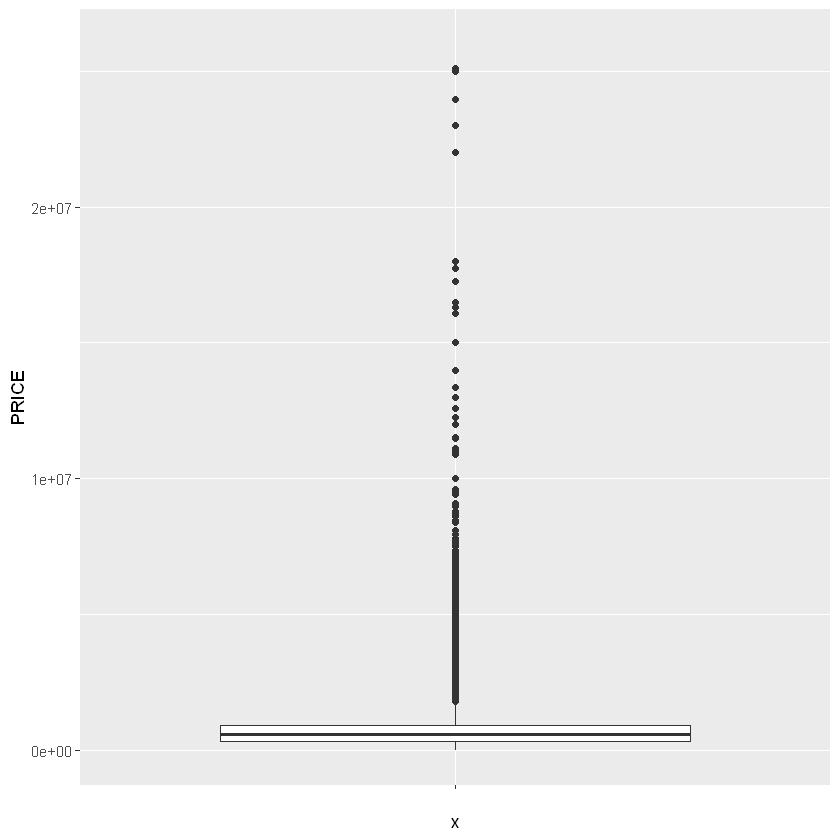

In [4]:
################################################################################
# Boxplot of the "PRICE" variable
# Install packages
install.packages("ggplot2")
install.packages("dplyr")
library("ggplot2")
library("dplyr")

# Create boxplot of the "PRICE" variable 
ggplot(data = HOUSE_TS1.df, aes(x = "", y = PRICE)) + 
  geom_boxplot() +
  coord_cartesian(ylim = c(0, 26000000)) # Set the y axis scale
################################################################################

In [5]:
################################################################################
# Install packages to work with dates
install.packages("lubridate")  # general package for handling and converting dates)
install.packages("linelist")   # has function to "guess" messy dates
install.packages("aweek")      # another option for converting dates to weeks, and weeks to dates
install.packages("zoo")        # additional date/time functions
install.packages("tidyverse")  # data management and visualization  
install.packages("rio")        # data import/export
library("lubridate")  
library("linelist")   
library("aweek")      
library("zoo")        
library("tidyverse")    
library("rio")   
################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'linelist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'aweek' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\zoo\libs\x64\zoo.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\zoo\libs\x64\zoo.dll: Permission denied"
Warning message:
"restored 'zoo'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpYZcE9N\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [6]:
################################################################################
# Clean up Date attribute
class(HOUSE_TS1.df$SALEDATE)   #Check the class of the "SALEDATE" field

# Because "SALEDATE" is class character, we must convert it to class Date
# Tell R how to identify the date parts of the "SALEDATE" field
# The format = argument specifies the date components and 
# drops the time component in the "SALEDATE'
HOUSE_TS1.df$SALEDATE <- as.Date(HOUSE_TS1.df$SALEDATE, format = "%Y/%m/%d")

head(HOUSE_TS1.df)   # Verify the time component was dropped

class(HOUSE_TS1.df$SALEDATE)   # Check the class of the "SALEDATE" field 

# Drop the 'day' from the date
HOUSE_TS2.df <- HOUSE_TS1.df
HOUSE_TS2.df$SALEDATE <- format(HOUSE_TS2.df$SALEDATE, format = "%Y-%m")

head(HOUSE_TS2.df)   # Verify the day component was dropped
################################################################################

[1] "character"

,SALEDATE,PRICE
,<date>,<int>
1,2013-07-22,755000
3,1996-02-12,118000
4,2022-04-06,1110000
6,2000-06-30,251000
7,2021-11-22,930388
8,2006-02-06,606500


[1] "Date"

,SALEDATE,PRICE
,<chr>,<int>
1,2013-07,755000
3,1996-02,118000
4,2022-04,1110000
6,2000-06,251000
7,2021-11,930388
8,2006-02,606500


In [7]:
################################################################################
# Calculate the mean "Price" by "SALEDATE" (year and month)
HOUSE_TS3.df <- HOUSE_TS2.df
HOUSE_TS3.df <- aggregate(PRICE~SALEDATE,HOUSE_TS2.df,mean)

summary(HOUSE_TS2.df)   #To check the variables and counts before the aggregation

summary(HOUSE_TS3.df)   #To check the variables and counts after the aggregation

head(HOUSE_TS3.df, 20)

tail(HOUSE_TS3.df, 20)

# Filter the dataframe for only sales after 2010-01
HOUSE_TS4.df <- HOUSE_TS3.df
HOUSE_TS4.df <- HOUSE_TS4.df %>% filter(SALEDATE > '2010-01')

summary(HOUSE_TS4.df)   #To check the variables and counts

str(HOUSE_TS4.df)   #To check the data structure   
################################################################################

   SALEDATE             PRICE         
 Length:62008       Min.   :       1  
 Class :character   1st Qu.:  300000  
 Mode  :character   Median :  557985  
                    Mean   :  706961  
                    3rd Qu.:  894000  
                    Max.   :25100000  

   SALEDATE             PRICE        
 Length:385         Min.   :  40000  
 Class :character   1st Qu.: 245945  
 Mode  :character   Median : 537826  
                    Mean   : 527439  
                    3rd Qu.: 736351  
                    Max.   :2650000  

,SALEDATE,PRICE
,<chr>,<dbl>
1,1900-01,48000.0
2,1979-07,99500.0
3,1982-09,40000.0
4,1984-07,40000.0
5,1986-05,87500.0
6,1986-08,850000.0
7,1987-06,535000.0
8,1987-09,785000.0
9,1988-08,322000.0


,SALEDATE,PRICE
,<chr>,<dbl>
366,2021-01,991249.8
367,2021-02,960506.2
368,2021-03,932663.5
369,2021-04,1019248.6
370,2021-05,1114840.0
371,2021-06,1164707.6
372,2021-07,1209038.3
373,2021-08,1044902.5
374,2021-09,964044.0


   SALEDATE             PRICE        
 Length:151         Min.   : 465351  
 Class :character   1st Qu.: 665168  
 Mode  :character   Median : 791885  
                    Mean   : 793526  
                    3rd Qu.: 898471  
                    Max.   :1309017  

'data.frame':	151 obs. of  2 variables:
 $ SALEDATE: chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ PRICE   : num  595215 488517 537826 542971 643488 ...


In [8]:
####################################################################
# Set time series (ts) for 'PRICE' variable

# Choose the 'PRICE' column and convert it to ts object

H_TS <- ts(HOUSE_TS4.df$PRICE, start=c(2010, 1), freq=12)

# Let us see the ts object

H_TS
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,595215.3,488517.5,537825.9,542970.6,643488.2,599364.5,591808.9,465350.5,576169.1,688463.2,687697.8,542757.8
2011,532661.0,555703.6,564982.7,582055.1,583731.9,792090.7,654924.3,561652.5,523012.3,556310.6,595629.8,537853.3
2012,608940.3,596914.4,546667.5,736617.2,666124.4,625026.2,676362.4,612457.6,664211.7,640776.1,637844.2,701649.3
2013,598139.5,640635.9,677421.4,697719.6,759096.3,909713.5,703899.2,973241.2,761342.1,620723.6,613852.6,602145.6
2014,662744.9,583706.0,729343.3,754645.3,803609.7,821932.3,792719.6,693807.1,695918.8,684731.3,670583.9,700451.1
2015,724380.8,633812.2,711374.5,829167.6,784320.9,748354.9,756925.8,790718.6,822803.3,787420.5,838821.1,736350.9
2016,703861.6,651072.1,720171.4,790311.8,838644.8,834619.8,891179.7,778843.7,1053742.0,778174.9,734638.4,748386.2
2017,876717.4,828342.3,811436.1,886845.9,904337.6,893951.0,800962.6,732815.8,796029.6,736735.3,800139.5,802549.5
2018,935284.0,791885.4,954471.2,873900.3,816293.9,852345.9,864262.2,764621.6,822613.3,881527.5,846599.1,850500.8
2019,856820.3,849466.2,843066.4,905470.0,930188.2,914024.4,835028.3,803078.1,879499.8,927483.3,873666.3,840044.5


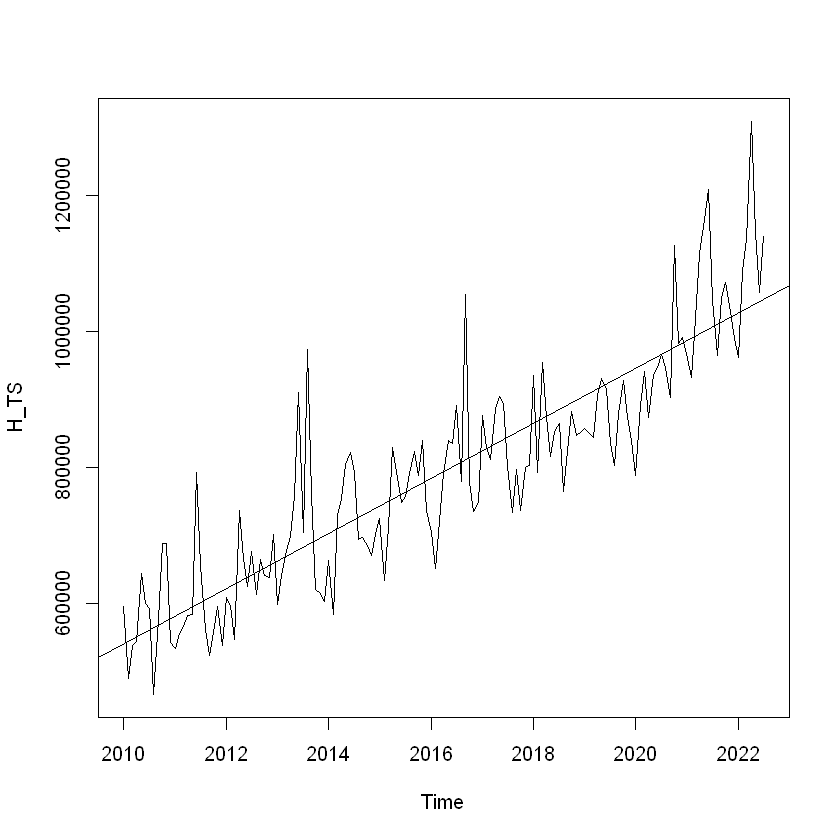

In [9]:
#####################################################################
# Let us fit a regression line on the dataset

plot(H_TS)

abline(reg=lm(H_TS~time(H_TS)))
#####################################################################

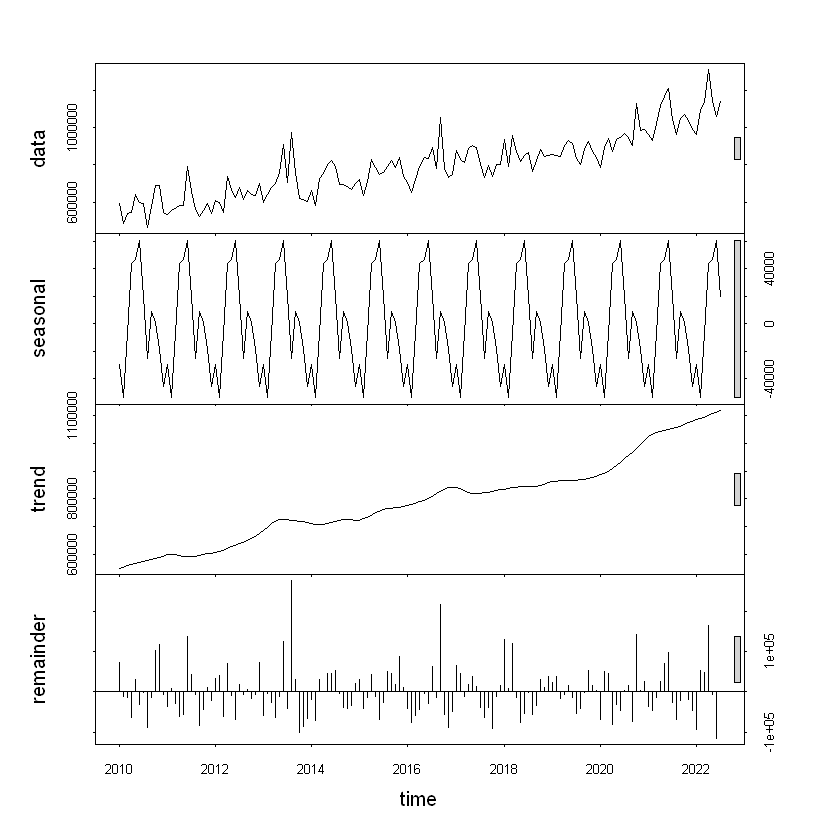

In [10]:
#####################################################################
# Plot the decomposition of the time series

decomp = stl(H_TS, s.window = "periodic")

plot(decomp)

#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,7,8,9,10,11,12
2018,1,2,3,4,5,6,7,8,9,10,11,12
2019,1,2,3,4,5,6,7,8,9,10,11,12


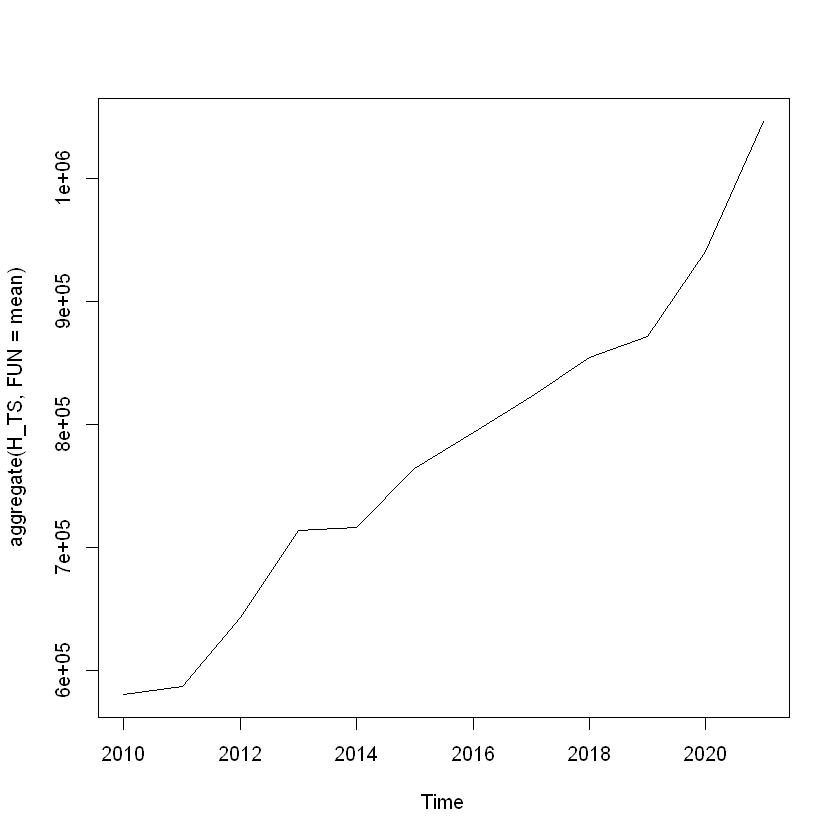

In [11]:
#####################################################################
# First let us plot the cycle and trend
# Aggregate the cycles and display a year-on-year trend

cycle(H_TS)

plot(aggregate(H_TS,FUN=mean))

#####################################################################

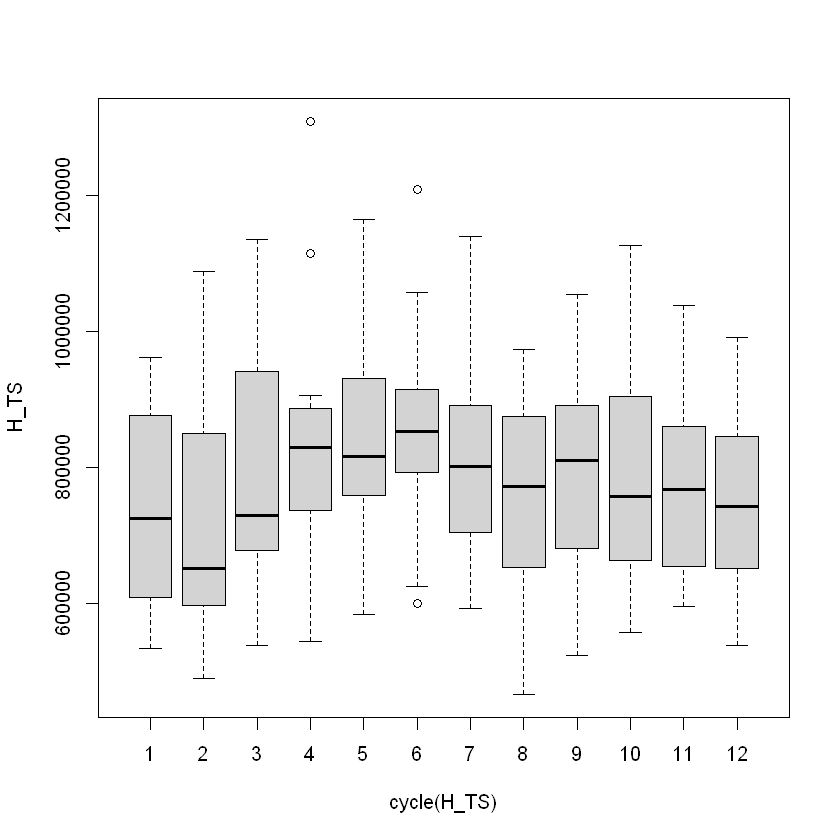

In [12]:
#####################################################################
# Letâ™s look in to the seasonal effects

boxplot(H_TS~cycle(H_TS))

#####################################################################

In [13]:
#####################################################################
# Since we want to remove the unequal variances in the data we will take the log of the series
# Before we fit the ARIMA model to our time series, we need to remove the unequal variances in 
# the data by taking the log of the series.

# Also, the original signal had trends and seasonal effects, so it was not stationary.  
# Therefore, we perform a diff of the signal and check if the trends and seasonal effect can be removed. 


library(tseries)

# Now perform the Augmented Dickey-Fuller Test

adf.test(diff(log(H_TS)), alternative="stationary", k=0)

# This will give you the result of the Augmented Dickey-Fuller Test
#####################################################################

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(diff(log(H_TS)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(log(H_TS))
Dickey-Fuller = -16.971, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


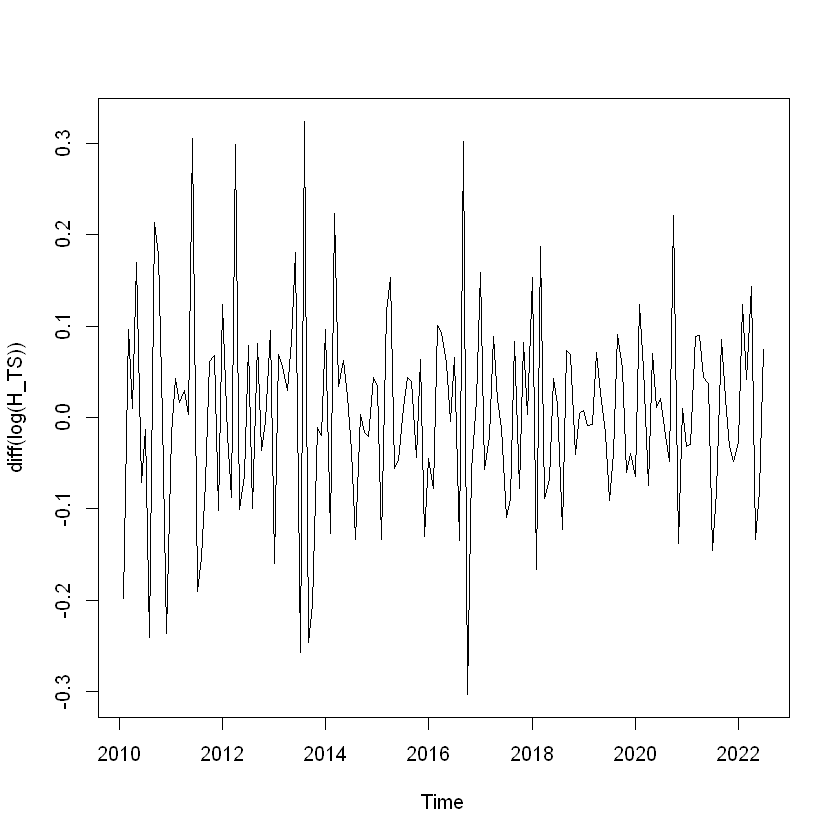

In [14]:
#####################################################################
# Let us now plot the series

plot(diff(log(H_TS)))

#####################################################################

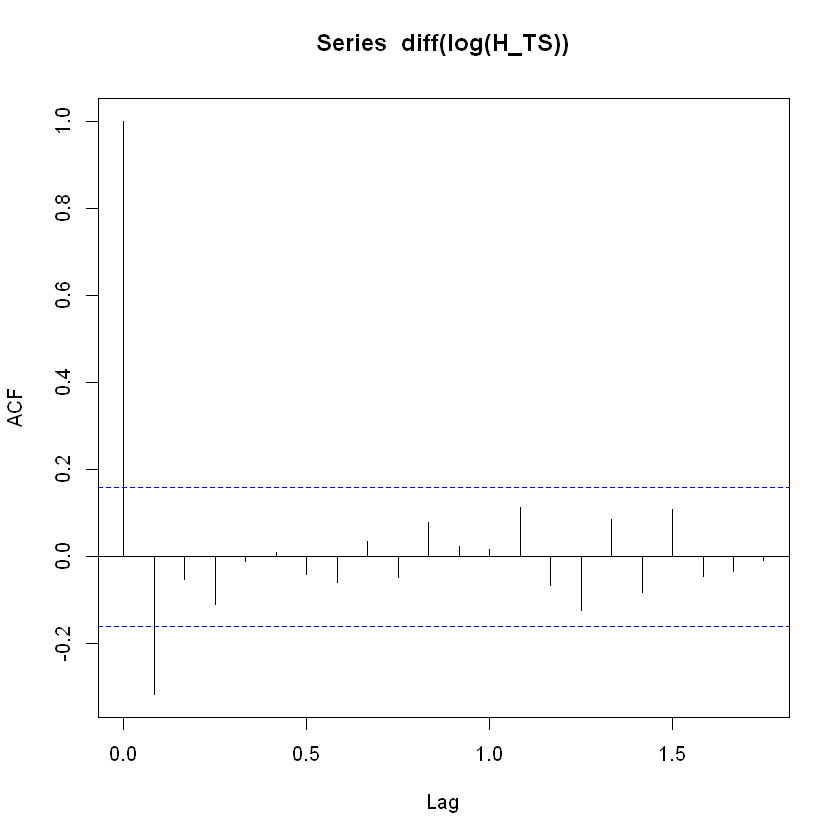

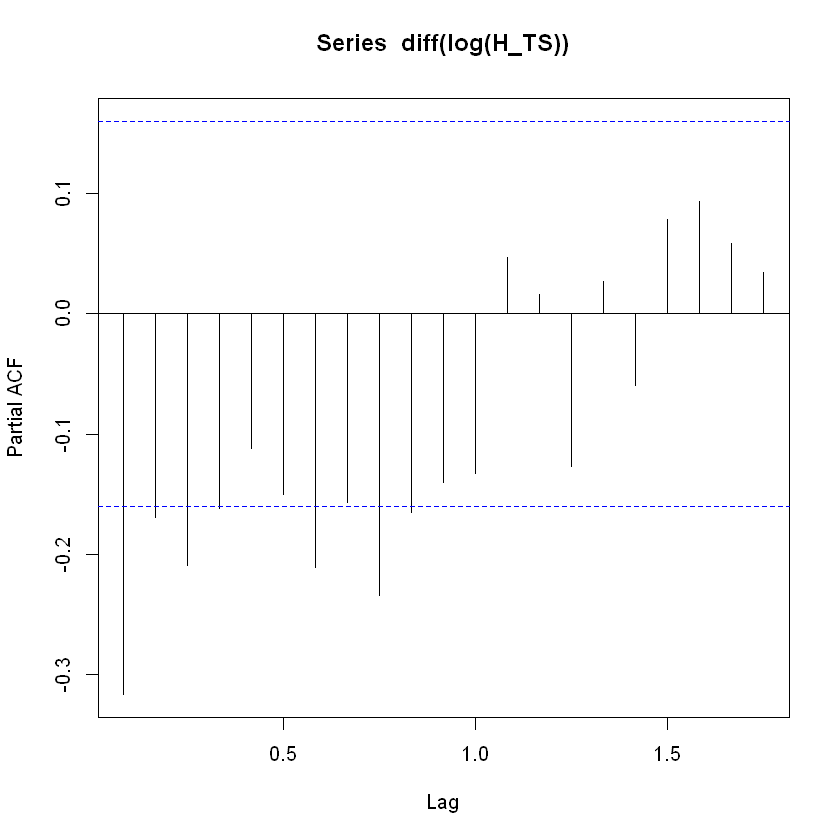

In [15]:
#####################################################################
# Now let us look into the ACF  and PACF charts

acf(diff(log(H_TS)))

pacf(diff(log(H_TS)))

# ARIMA (1,1,2)

#####################################################################

Warning message:
"package 'forecast' is in use and will not be installed"



Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
         ar1      ma1      ma2     sar1     sma1     sma2
      0.2356  -0.9336  -0.0089  -0.9239  -0.1129  -0.8866
s.e.  0.2987   0.3055   0.2703   0.3111   0.4323   0.4184

sigma^2 estimated as 0.007417:  log likelihood = 125.48,  aic = -236.97

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.001401967,0.08242639,0.06049528,0.007481661,0.4453922,0.7132494,0.0006006697



Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
         ar1      ma1      ma2     sar1     sma1     sma2
      0.2356  -0.9336  -0.0089  -0.9239  -0.1129  -0.8866
s.e.  0.2987   0.3055   0.2703   0.3111   0.4323   0.4184

sigma^2 estimated as 0.007417:  log likelihood = 125.48,  aic = -236.97

Training set error measures:
                      ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.001401967 0.08242639 0.06049528 0.007481661 0.4453922 0.7132494
                     ACF1
Training set 0.0006006697


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(1,1,2)[12]
Q* = 33.934, df = 18, p-value = 0.01283

Model df: 6.   Total lags used: 24



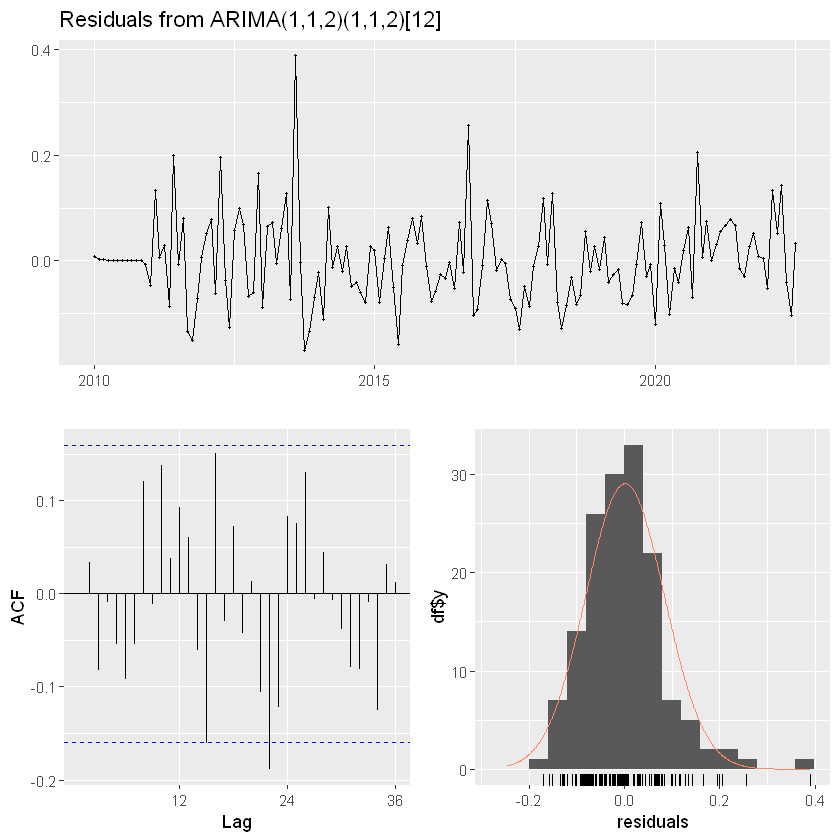

In [30]:
install.packages("forecast") 
library("forecast") 

#####################################################################
# Let us now fit the ARIMA(1,1,2)

(fit_open <- arima(log(H_TS), c(1, 1, 2),seasonal = list(order = c(1, 1, 2), period = 12)))

# Produce error measures
accuracy(fit_open)

# Examine the AIC
summary(fit_open)

# Examine the Residuals
checkresiduals(fit_open) 

#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,527519.0,526785.0,566813.8,607327.9,608506.5,562083.2,524669.7,576538.0,660198.3,651654.2,576468.6
2011,540945.9,552262.7,566931.0,578206.2,635402.4,705709.4,665897.9,575310.4,540996.9,557815.8,571355.9,570069.2
2012,588162.1,587359.1,606716.6,671506.6,673473.0,648134.8,647552.2,641372.3,645414.3,645902.0,654528.5,659820.6
2013,634641.0,639208.2,673299.6,707989.2,781406.4,820605.6,822688.3,852930.9,779162.2,654160.5,612643.6,620222.2
2014,627835.4,639875.1,699259.5,760560.9,795949.3,810048.5,775294.6,719063.1,692594.0,683991.4,681587.6,698966.8
2015,695756.2,675844.9,721432.2,788507.6,786541.1,759489.1,763231.3,790291.6,805936.4,809116.4,800353.4,753846.1
2016,698786.6,681544.3,720431.7,784860.0,825555.3,849766.0,848955.7,875652.3,916125.7,836182.5,748959.4,777032.0
2017,832540.8,836209.5,834515.1,872366.4,897368.0,873300.5,807173.0,765656.0,765402.6,767409.9,784890.9,835130.6
2018,866250.7,868381.5,893682.0,879641.4,839708.5,846311.9,836373.0,804029.7,822843.9,858066.8,856306.6,851105.3
2019,853401.9,849704.8,860267.3,896048.7,919967.7,898316.4,846789.8,830171.1,872390.3,902033.2,878715.1,835351.9


Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"


         Point Forecast     Lo 80   Hi 80    Lo 95   Hi 95
Jul 2022        1074127 1010770.1 1137484 977230.9 1171023
Aug 2022        1048508  959921.8 1137094 913027.1 1183989
Sep 2022        1055151  946807.2 1163496 889453.3 1220850
Oct 2022        1057799  932667.2 1182930 866426.6 1249171
Nov 2022        1046079  906434.8 1185724 832511.3 1259647
Dec 2022        1030459  878014.0 1182904 797314.6 1263603
Jan 2023        1031157  866864.5 1195449 779893.5 1282420
Feb 2023        1030650  855294.5 1206005 762467.0 1298833
Mar 2023        1065347  878882.7 1251811 780174.7 1350519
Apr 2023        1105415  907677.5 1303152 803001.8 1407827
May 2023        1132422  923492.5 1341351 812892.1 1451951
Jun 2023        1139602  919897.8 1359307 803593.3 1475612
Jul 2023        1114037  884472.4 1343601 762948.3 1465125
Aug 2023        1088418  849791.0 1327045 723469.6 1453366
Sep 2023        1095061  847581.9 1342541 716574.2 1473548
Oct 2023        1097709  841623.7 1353794 706060.5 14893

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-61.73096,34170.48,26007.68,-0.1094881,3.351521,0.4040804,0.3803187



	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 111.76, df = 8, p-value < 2.2e-16

Model df: 16.   Total lags used: 24




Forecast method: ETS(M,A,A)

Model Information:
ETS(M,A,A) 

Call:
 ets(y = object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 560210.2322 
    b = 3326.7426 
    s = -38562.27 -35942.5 -16988.42 -1947.793 -1269.446 -4589.03
           24361.46 53258.8 49403.56 25712.88 -11026.29 -42410.96

  sigma:  0.046

     AIC     AICc      BIC 
3887.331 3892.002 3938.398 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -61.73096 34170.48 26007.68 -0.1094881 3.351521 0.4040804
                  ACF1
Training set 0.3803187

Forecasts:
         Point Forecast     Lo 80   Hi 80    Lo 95   Hi 95
Jul 2022        1074127 1010770.1 1137484 977230.9 1171023
Aug 2022        1048508  959921.8 1137094 913027.1 1183989
Sep 2022        1055151  946807.2 1163496 889453.3 1220850
Oct 2022        1057

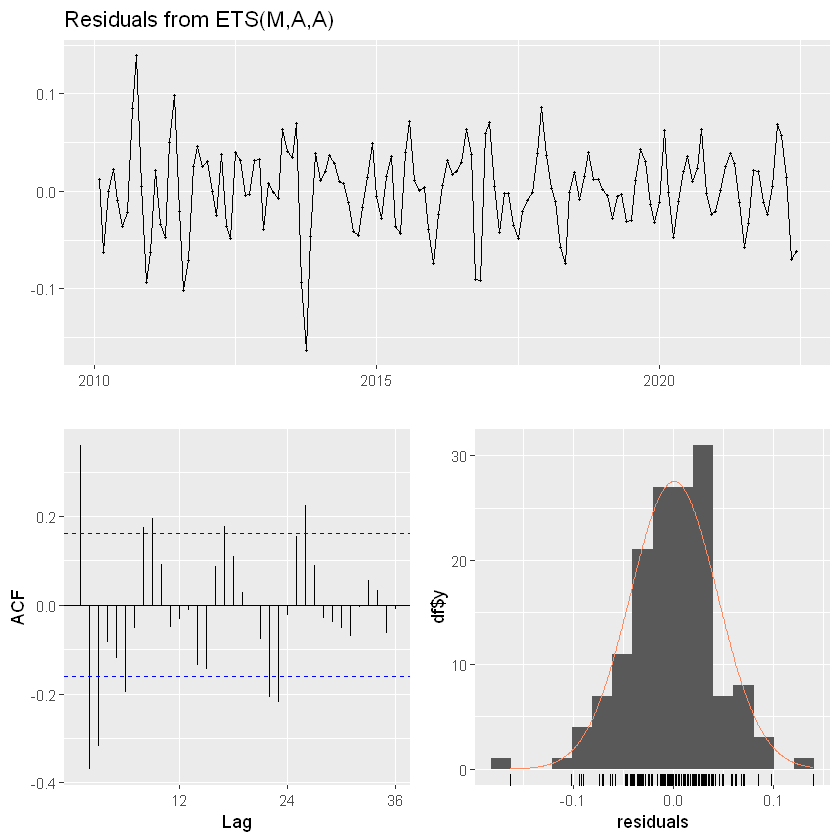

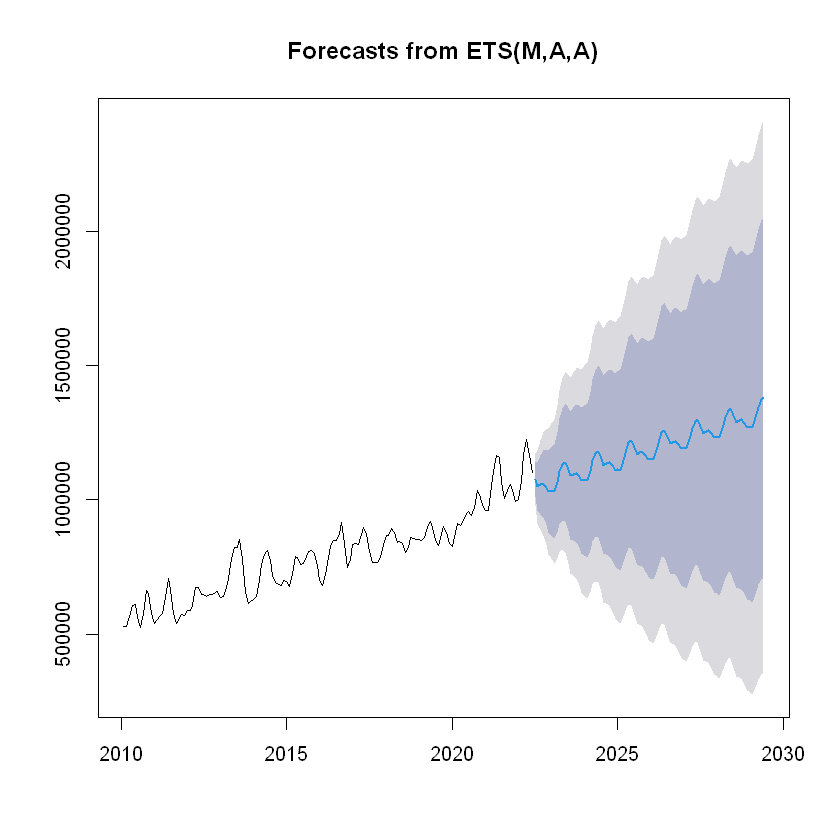

In [28]:
################################################################################
# Using Simple Moving Average
# forecasting model using SMA

SMA_fit <- ma(H_TS, order = 2)
SMA_fit

SMA_fit_pred <- forecast(SMA_fit, h=84)
SMA_fit_pred

# Examine model accuracy
accuracy(SMA_fit_pred)

# Examine the Residuals
checkresiduals(SMA_fit_pred) 

# Examine the AIC
summary(SMA_fit_pred)

plot(SMA_fit_pred)

################################################################################

In [23]:
#####################################################################
# Now let us do some prediction for the next 7 years

# Monthly Average Sale Price
pred_H_TS <- predict(fit_open, n.ahead = 7*12)

pred_H_TS

pred_H_TS$pred2 <- 2.71828^(pred_H_TS$pred)

pred_H_TS


# Calculate mean and standard deviation of the prediction
Avg.vF <- mean(pred_H_TS$pred2)
Avg.vF

StandD <- sd(pred_H_TS$pred2)
StandD

############################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,13.86614,13.92170,13.92161,13.90079,13.87548
2023,13.89798,13.86015,13.92016,13.99245,14.01169,14.04547,13.97789,13.92683,13.97013,13.95753,13.95306,13.91525
2024,13.94290,13.91041,13.98177,14.04520,14.05457,14.07058,14.04428,13.97193,14.02797,14.02726,14.00777,13.98153
2025,14.00442,13.96699,14.02788,14.09949,14.11798,14.15040,14.08597,14.03329,14.07755,14.06586,14.06025,14.02332
2026,14.05060,14.01774,14.08830,14.15236,14.16242,14.17968,14.15048,14.07963,14.13477,14.13322,14.11479,14.08773
2027,14.11095,14.07388,14.13550,14.20653,14.22438,14.25565,14.19390,14.13984,14.18493,14.17401,14.16742,14.13125
2028,14.15822,14.12503,14.19492,14.25950,14.27016,14.28848,14.25681,14.18723,14.24161,14.23935,14.22181,14.19407
2029,14.21757,14.18079,14.24304,14.31359,14.33089,14.36117,14.30171,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.08968920,0.09372191,0.09444029,0.09477569,0.09505019


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,13.86614,13.92170,13.92161,13.90079,13.87548
2023,13.89798,13.86015,13.92016,13.99245,14.01169,14.04547,13.97789,13.92683,13.97013,13.95753,13.95306,13.91525
2024,13.94290,13.91041,13.98177,14.04520,14.05457,14.07058,14.04428,13.97193,14.02797,14.02726,14.00777,13.98153
2025,14.00442,13.96699,14.02788,14.09949,14.11798,14.15040,14.08597,14.03329,14.07755,14.06586,14.06025,14.02332
2026,14.05060,14.01774,14.08830,14.15236,14.16242,14.17968,14.15048,14.07963,14.13477,14.13322,14.11479,14.08773
2027,14.11095,14.07388,14.13550,14.20653,14.22438,14.25565,14.19390,14.13984,14.18493,14.17401,14.16742,14.13125
2028,14.15822,14.12503,14.19492,14.25950,14.27016,14.28848,14.25681,14.18723,14.24161,14.23935,14.22181,14.19407
2029,14.21757,14.18079,14.24304,14.31359,14.33089,14.36117,14.30171,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.08968920,0.09372191,0.09444029,0.09477569,0.09505019


[1] 1326635

[1] 162143.2

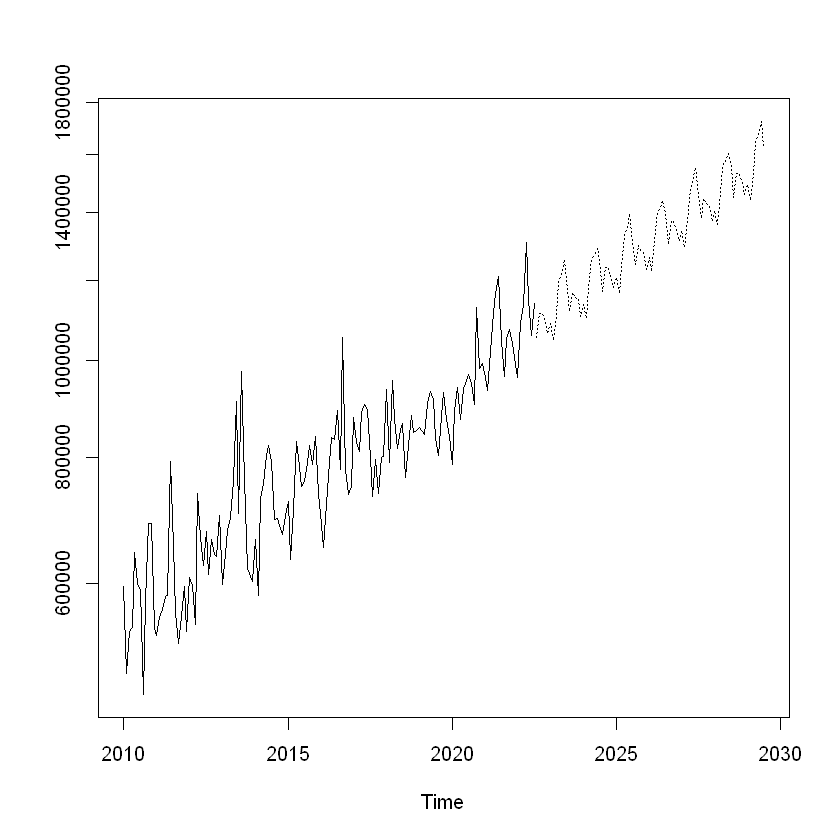

In [24]:
# Plot of Predictions

#####################################################################

ts.plot(H_TS,2.71828^pred_H_TS$pred, log = "y", lty = c(1,3))

#####################################################################

         Point Forecast     Lo 80   Hi 80     Lo 95   Hi 95
Aug 2022        1101980 1007334.7 1196625  957232.6 1246727
Sep 2022        1096809  995750.3 1197867  942253.1 1251365
Oct 2022        1131024 1028633.5 1233414  974431.2 1287617
Nov 2022        1107689 1004772.8 1210605  950292.4 1265085
Dec 2022        1106476 1003215.0 1209738  948551.7 1264401
Jan 2023        1102695  999138.3 1206252  944318.6 1261072
Feb 2023        1113840 1010003.4 1217677  955035.5 1272645
Mar 2023        1135403 1031292.1 1239514  976179.0 1294627
Apr 2023        1173380 1068996.2 1277763 1013739.0 1333020
May 2023        1163095 1058441.0 1267750 1003040.4 1323150
Jun 2023        1162886 1057961.3 1267810 1002417.6 1323354
Jul 2023        1150530 1045335.6 1255724  989649.3 1311410
Aug 2023        1136836 1030003.4 1243668  973449.7 1300222
Sep 2023        1151726 1044256.7 1259196  987365.7 1316087
Oct 2023        1156965 1049079.7 1264849  991969.0 1321960
Nov 2023        1155656 1047417.3 126389

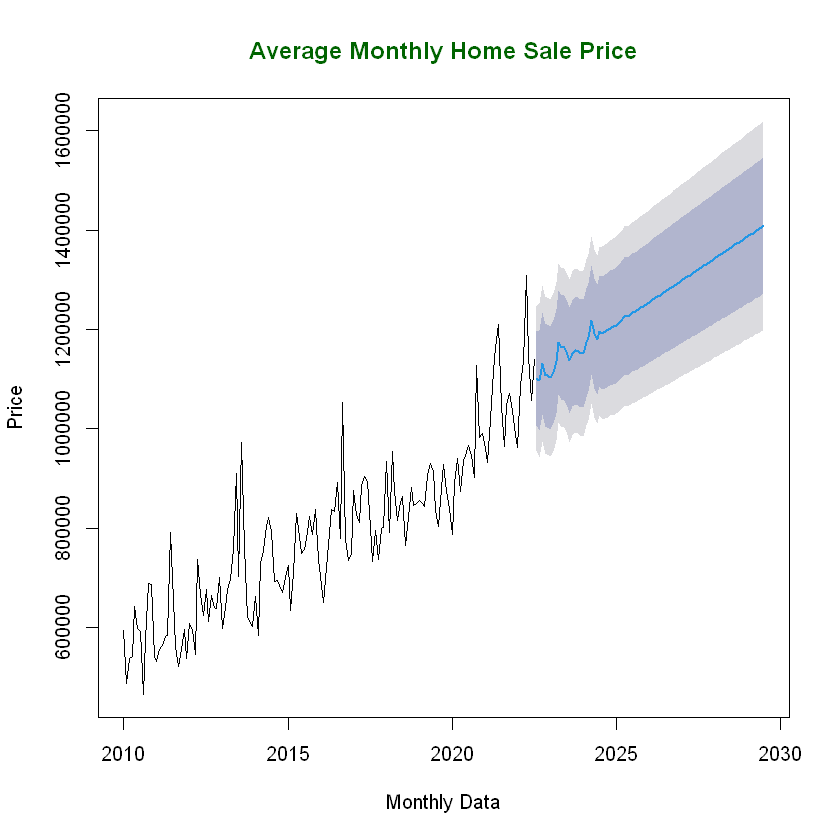

In [25]:
################################Using auto.arima################################
################################################################################

# forecasting model using auto arima model
fit <- auto.arima(H_TS)

# Next 84 forecasted values
forecast(fit, 84)

# plotting the graph with next
# 84 monthly forecasted values
plot(forecast(fit, 84), xlab ="Monthly Data",
     ylab ="Price",
     main ="Average Monthly Home Sale Price", col.main ="darkgreen")

################################################################################

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-693.6328,72119.81,54352.99,-1.047495,6.952791,0.6544243,-0.006331872


Series: H_TS 
ARIMA(1,1,1)(1,0,2)[12] with drift 

Coefficients:
         ar1      ma1    sar1     sma1    sma2      drift
      0.3203  -0.9460  0.1262  -0.0087  0.1574  3675.7558
s.e.  0.1029   0.0501  0.7753   0.7755  0.1157   726.9307

sigma^2 = 5.454e+09:  log likelihood = -1892.38
AIC=3798.76   AICc=3799.55   BIC=3819.84

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -693.6328 72119.81 54352.99 -1.047495 6.952791 0.6544243
                     ACF1
Training set -0.006331872


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,0,2)[12] with drift
Q* = 21.026, df = 19, p-value = 0.3354

Model df: 5.   Total lags used: 24



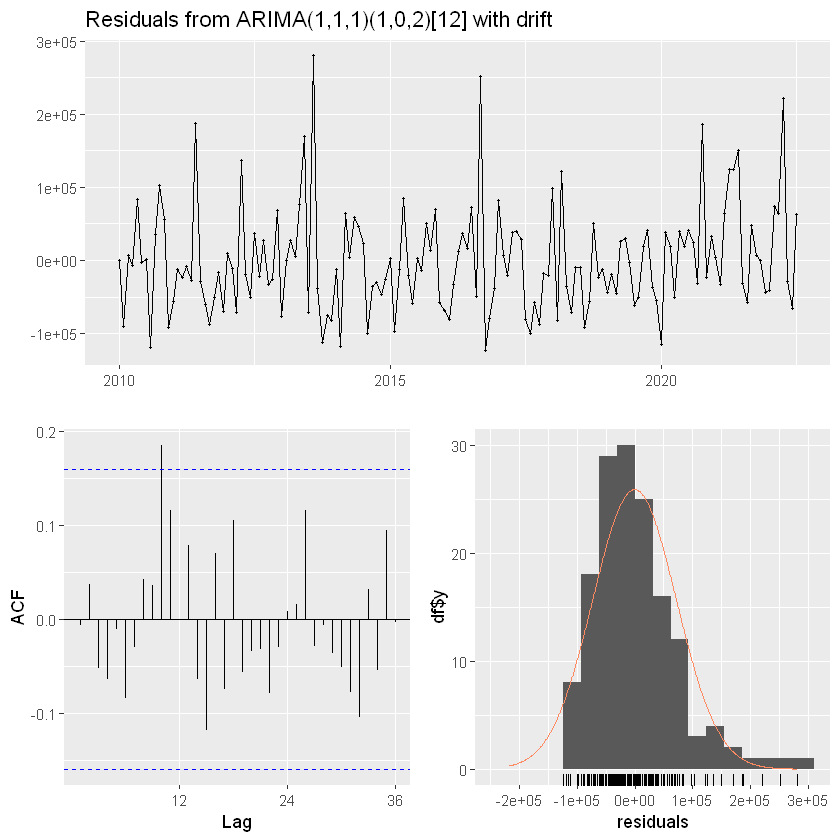

In [29]:
#####################################################################

# Produce error measures
accuracy(fit)

# Examine the AIC
summary(fit)

# Examine the Residuals
checkresiduals(fit) 

#####################################################################

In [31]:
#####################################################################
# Manipulate the Predicted Output into a Dataframe
pred_H_TS$pred2

# Converting to data frame
H_TS_DF <- as.data.frame(pred_H_TS$pred2)

H_TS_DF

# Changing the sales column name
colnames(H_TS_DF)[1] <- "Average Home Sale Price"

H_TS_DF

# Creating the 84 dates
Date <- seq(as.Date("2022/8/1"), by = "month", length.out = 84)
Date

# Adding the dates to the dataframe
H_TS_DF$Date <- Date

H_TS_DF

# Deleting the first column
# H_TS_DF_F <- H_TS_DF[-c(1)]
# H_TS_DF_F

# Re-order the columns
H_TS_DF_F <- H_TS_DF[, c(2, 1)]
H_TS_DF_F

# Generate output value based on date
OutP <- H_TS_DF_F[H_TS_DF_F$Date == '2022-12-01', ]
OutP
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,1051927,1112021,1111922,1089014,1061798
2023,1085951,1045636,1110316,1193548,1216735,1258534,1176299,1117742,1167198,1152588,1147446,1104876
2024,1135849,1099533,1180867,1258198,1270045,1290538,1257045,1169309,1236706,1235832,1211972,1180582
2025,1207916,1163547,1236587,1328390,1353180,1397775,1310552,1243296,1299567,1284462,1277270,1230967
2026,1265016,1224111,1313612,1400508,1414676,1439300,1397883,1302265,1376092,1373970,1348868,1312864
2027,1343710,1294802,1377096,1478480,1505105,1552913,1459919,1383084,1446878,1431166,1421765,1371253
2028,1408747,1362758,1461401,1558901,1575605,1604740,1554706,1450213,1531255,1527804,1501244,1460160
2029,1494893,1440909,1533453,1645540,1674257,1725737,1626111,,,,,


x
<ts>
1051927
1112021
1111922
1089014
1061798
1085951
1045636
1110316
1193548


Average Home Sale Price
<ts>
1051927
1112021
1111922
1089014
1061798
1085951
1045636
1110316
1193548


[1] "2022-08-01" "2022-09-01" "2022-10-01" "2022-11-01" "2022-12-01"
 [6] "2023-01-01" "2023-02-01" "2023-03-01" "2023-04-01" "2023-05-01"
[11] "2023-06-01" "2023-07-01" "2023-08-01" "2023-09-01" "2023-10-01"
[16] "2023-11-01" "2023-12-01" "2024-01-01" "2024-02-01" "2024-03-01"
[21] "2024-04-01" "2024-05-01" "2024-06-01" "2024-07-01" "2024-08-01"
[26] "2024-09-01" "2024-10-01" "2024-11-01" "2024-12-01" "2025-01-01"
[31] "2025-02-01" "2025-03-01" "2025-04-01" "2025-05-01" "2025-06-01"
[36] "2025-07-01" "2025-08-01" "2025-09-01" "2025-10-01" "2025-11-01"
[41] "2025-12-01" "2026-01-01" "2026-02-01" "2026-03-01" "2026-04-01"
[46] "2026-05-01" "2026-06-01" "2026-07-01" "2026-08-01" "2026-09-01"
[51] "2026-10-01" "2026-11-01" "2026-12-01" "2027-01-01" "2027-02-01"
[56] "2027-03-01" "2027-04-01" "2027-05-01" "2027-06-01" "2027-07-01"
[61] "2027-08-01" "2027-09-01" "2027-10-01" "2027-11-01" "2027-12-01"
[66] "2028-01-01" "2028-02-01" "2028-03-01" "2028-04-01" "2028-05-01"
[71] "2028-06-01" "2028-07-01" "2028-08-01" "2028-09-01" "2028-10-01"
[76] "2028-11-01" "2028-12-01" "2029-01-01" "2029-02-01" "2029-03-01"
[81] "2029-04-01" "2029-05-01" "2029-06-01" "2029-07-01"

Average Home Sale Price,Date
<ts>,<date>
1051927,2022-08-01
1112021,2022-09-01
1111922,2022-10-01
1089014,2022-11-01
1061798,2022-12-01
1085951,2023-01-01
1045636,2023-02-01
1110316,2023-03-01
1193548,2023-04-01


Date,Average Home Sale Price
<date>,<ts>
2022-08-01,1051927
2022-09-01,1112021
2022-10-01,1111922
2022-11-01,1089014
2022-12-01,1061798
2023-01-01,1085951
2023-02-01,1045636
2023-03-01,1110316
2023-04-01,1193548


,Date,Average Home Sale Price
,<date>,<dbl>
5,2022-12-01,1061798
